<a href="https://colab.research.google.com/github/Karosemi/LinearRegression/blob/master/Sprawozdanie3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!jupyter-kernelspec list
%load_ext rpy2.ipython
import rpy2

Available kernels:
  ir         /usr/local/share/jupyter/kernels/ir
  python2    /usr/local/share/jupyter/kernels/python2
  python3    /usr/local/share/jupyter/kernels/python3
  swift      /usr/local/share/jupyter/kernels/swift


In [85]:
%%R
install.packages("Hmisc")
install.packages("corrplot")
install.packages("PerformanceAnalytics")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘xts’, ‘quadprog’, ‘zoo’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.11-2.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 537024 bytes (524 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 524 KB


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/quadprog_1.5-7.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 35925 bytes (35 KB)

  wa

In [86]:
%%R
library(Hmisc)
library(corrplot)
library("PerformanceAnalytics")

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: xts

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: zoo

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘zoo’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Package PerformanceAnalytics 

# Sprawozdanie 3.
## Pakiety statystyczne

## Marta Kierat, Karolina Schmidt

### 23.06.2019r

### Wstęp

Model prostej regresji zakłada, że wartości danej zmiennej Y zależą od zmiennej objaśniającej X. Jednak sytuacja, w której zmienna objaśniana zależy tylko od jednej zmiennej objaśniającej zdarza się rzadko.  Zazwyczaj badane zjawisko zależy od wielu czynników, jak na przykład pogoda. Odczuwalna przez nas temperatura i wilgotność, zależą od takich czynników jak ciśnienie, prędkość wiatru, zachmurzenie. W takim przypadku można zastosować model regresji wielorakiej. *Wielorakość* oznacza tu, że model opisuje więcej niż jedna zmienna objaśniająca. W przypadku danych pogodowych model ten mogłby uwzględnić wszystkie składowe odpowiadające za warunki atmosferyczne.

### Źrodło danych

Dane użyte w raporcie pochodzą ze strony kagggle.com ([źrodło danych](https://www.kaggle.com/muthuj7/weather-dataset)) i zawierają dane na temat warunków atmosferycznych z godzinnym interwałem czasowym. Zbiór zawiera 12 zmiennych, z czego 9 jest ciągłych. Kolumny zawierają informację na temat temperatury, odczuwalnej temperatury, wilgotności, ciśnienia, prędkości wiatru , widoczności, zachmurzenia oraz opadów. W zbiorze wielkości 96441 nie występują braki danych (wartość *null* w kolumnie *Precip.Type* oznacza brak opadów).  Poniżej przedstawione są  nazwy kolumn wraz z opisem typu zmiennych w nich zawartych. Tabela poniżej przedstawia statystyki zmiennych ze zbioru. 

In [0]:

%%R
url = 'https://raw.githubusercontent.com/Karosemi/LinearRegression/master/weatherHistory.csv'
df <- read.csv(url,header=TRUE, sep=",")

In [90]:
%%R
str(df)

'data.frame':	96453 obs. of  12 variables:
 $ Formatted.Date          : Factor w/ 96429 levels "2006-01-01 00:00:00.000 +0100",..: 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 ...
 $ Summary                 : Factor w/ 27 levels "Breezy","Breezy and Dry",..: 20 20 18 20 18 20 20 20 20 20 ...
 $ Precip.Type             : Factor w/ 3 levels "null","rain",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Temperature..C.         : num  9.47 9.36 9.38 8.29 8.76 ...
 $ Apparent.Temperature..C.: num  7.39 7.23 9.38 5.94 6.98 ...
 $ Humidity                : num  0.89 0.86 0.89 0.83 0.83 0.85 0.95 0.89 0.82 0.72 ...
 $ Wind.Speed..km.h.       : num  14.12 14.26 3.93 14.1 11.04 ...
 $ Wind.Bearing..degrees.  : num  251 259 204 269 259 258 259 260 259 279 ...
 $ Visibility..km.         : num  15.8 15.8 15 15.8 15.8 ...
 $ Loud.Cover              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Pressure..millibars.    : num  1015 1016 1016 1016 1017 ...
 $ Daily.Summary           : Factor w/ 214 levels "Breezy and foggy star

In [0]:
%%R 
summary(df)

                       Formatted.Date                 Summary      Precip.Type 
 2010-08-02 00:00:00.000 +0200:    2   Partly Cloudy      :31733   null:  517  
 2010-08-02 01:00:00.000 +0200:    2   Mostly Cloudy      :28094   rain:85224  
 2010-08-02 02:00:00.000 +0200:    2   Overcast           :16597   snow:10712  
 2010-08-02 03:00:00.000 +0200:    2   Clear              :10890               
 2010-08-02 04:00:00.000 +0200:    2   Foggy              : 7148               
 2010-08-02 05:00:00.000 +0200:    2   Breezy and Overcast:  528               
 (Other)                      :96441   (Other)            : 1463               
 Temperature..C.   Apparent.Temperature..C.    Humidity      Wind.Speed..km.h.
 Min.   :-21.822   Min.   :-27.717          Min.   :0.0000   Min.   : 0.000   
 1st Qu.:  4.689   1st Qu.:  2.311          1st Qu.:0.6000   1st Qu.: 5.828   
 Median : 12.000   Median : 12.000          Median :0.7800   Median : 9.966   
 Mean   : 11.933   Mean   : 10.855          

### Mapa korelacji

Aby ustalić,  które zmienne są znaczące w doborze modelu, należy zbadać zależności pomiędzy tymi zmiennymi, czyli wyznaczyć korelacje. Aby to zrobić, należy usunąć zmienne kategoryczne, ponieważ korelacje wyznacza się  pomiędzy zmiennymi numerycznymi. Wybrane do analizy zmienne to temperatura, odczuwalna temperatura, wilgotność, prędkość wiatru, widoczność i i ciśnienie. Składowe, wraz z informacją o opadach i zachmurzeniu, zawierają pełną informację o aktualnych warunkach atmosferycznych.

In [100]:
%%R
#ramka danych z samymi zmiennymi ciaglymi, aby moc sprawdzic czy zmienne sa skorelowane
df.drop <- subset(df,select=-c(Formatted.Date,Wind.Bearing..degrees.,Loud.Cover,Precip.Type,Summary, Daily.Summary  ))
df.drop <- na.omit(df.drop)
str(df.drop)

'data.frame':	96453 obs. of  6 variables:
 $ Temperature..C.         : num  9.47 9.36 9.38 8.29 8.76 ...
 $ Apparent.Temperature..C.: num  7.39 7.23 9.38 5.94 6.98 ...
 $ Humidity                : num  0.89 0.86 0.89 0.83 0.83 0.85 0.95 0.89 0.82 0.72 ...
 $ Wind.Speed..km.h.       : num  14.12 14.26 3.93 14.1 11.04 ...
 $ Visibility..km.         : num  15.8 15.8 15 15.8 15.8 ...
 $ Pressure..millibars.    : num  1015 1016 1016 1016 1017 ...


Poniższy wykres jest mapą korelacji wybranych zmiennych ciągłych. Zauważalnym jest, że pomiędzy temperaturą a wilgotnością istnieje wyraźna silna korelacja (ew. średnio silna, wartość 0.6). Trochę słabsza, lecz wciąż wyraźna zależność występuje pomiędzy widocznością a wilgotnością i pomiędzy wilgotnością a temperaturą. Wynika to za pewne z tego, że przy dużej wilgotności powietrza może wystąpić mgła. Słabe korelacje zauważalne są pomiędzy ciśnieniem a temperaturą. Prędkość wiatru jest bardzo słabo skorelowana z innymi zmiennymi.

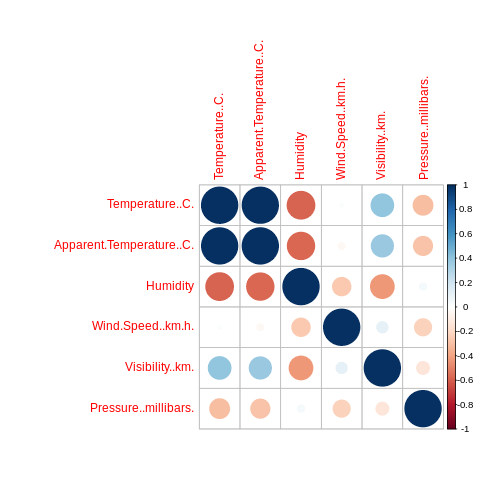

In [101]:
%%R
df.cor = cor(df.drop, method = "spearman", use = "complete.obs")
corrplot(df.cor)

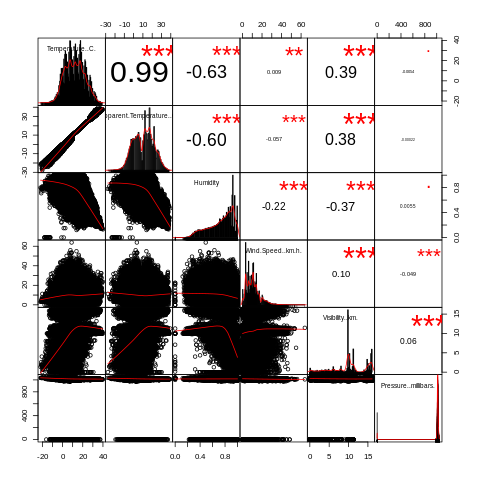

In [88]:
%%R
chart.Correlation(df.drop, histogram=TRUE, pch=19)

## Modele

W celu doboru odpowiedniego modelu część zmiennych należy usunąć. Są to kolumny z informacją o czasie pomiaru, kierunku wiatru oraz zachmurzeniu. Poniżej przedstawione są wybrane kolumny danych.

In [0]:
%%R
#usunięcie zbędnych kolumn
dane <- subset(df,select=-c(Formatted.Date,Wind.Bearing..degrees.,Loud.Cover))
dane <- na.omit(dane)
#zamiana zmiennej ciągłej na zmienną kategoryczną
lvl <-c(0,0.25,0.5,0.75,10)
dane$Humidity.cat <- cut(dane$Humidity,lvl,include.lowest=T, labels=c("very low", "low", "middle", "high"))
#dane <- subset(dane, select=-c(Humidity))
dane$Precip.Type <- as.numeric(dane$Precip.Type)


In [107]:
%%R
head(dane)

        Summary Precip.Type Temperature..C. Apparent.Temperature..C. Humidity
1 Partly Cloudy           2        9.472222                 7.388889     0.89
2 Partly Cloudy           2        9.355556                 7.227778     0.86
3 Mostly Cloudy           2        9.377778                 9.377778     0.89
4 Partly Cloudy           2        8.288889                 5.944444     0.83
5 Mostly Cloudy           2        8.755556                 6.977778     0.83
6 Partly Cloudy           2        9.222222                 7.111111     0.85
  Wind.Speed..km.h. Visibility..km. Pressure..millibars.
1           14.1197         15.8263              1015.13
2           14.2646         15.8263              1015.63
3            3.9284         14.9569              1015.94
4           14.1036         15.8263              1016.41
5           11.0446         15.8263              1016.51
6           13.9587         14.9569              1016.66
                      Daily.Summary Humidity.cat
1 Part

### Model 1. - zmienne ciągłe

In [108]:
%%R #sprawdzenie modeli tylko ze zmiennymi ciągłymi

model.null <- lm(Apparent.Temperature..C.~1,data=dane[1:3000,])
model.full <- lm(Apparent.Temperature..C.~Temperature..C.+Wind.Speed..km.h.+Precip.Type+Visibility..km.+Pressure..millibars.,data=dane[1:3000,])
model1 <- step(model.full,formula(model.null))
AIC(model1)

Start:  AIC=256.92
Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Precip.Type + Visibility..km. + Pressure..millibars.

                       Df Sum of Sq    RSS     AIC
- Precip.Type           1         2   3257   256.3
<none>                                3255   256.9
- Pressure..millibars.  1         4   3259   258.6
- Visibility..km.       1         5   3260   259.1
- Wind.Speed..km.h.     1      2103   5358  1749.9
- Temperature..C.       1    159467 162723 11990.3

Step:  AIC=256.32
Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Visibility..km. + Pressure..millibars.

                       Df Sum of Sq    RSS     AIC
<none>                                3257   256.3
- Pressure..millibars.  1         4   3261   258.2
- Visibility..km.       1         5   3262   259.1
- Wind.Speed..km.h.     1      2149   5406  1774.5
- Temperature..C.       1    233355 236612 13111.4
[1] 8771.948


### Model 2. -zmienne kategoryczne

In [0]:
%%R #modele ze zmiennymi kategorycznymi
#model.null2 <- lm(Apparent.Temperature..C.~1,data=dane[1:3000,])
model.full2 <- lm(Apparent.Temperature..C.~.,data=dane[1:3000,])
model2 <-step(model.full2,formula(model.null))
AIC(model2)

Start:  AIC=-220.23
Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Humidity + Wind.Speed..km.h. + Visibility..km. + Pressure..millibars. + 
    Daily.Summary + Humidity.cat

                       Df Sum of Sq   RSS    AIC
- Humidity              1         0  2680 -221.8
- Visibility..km.       1         1  2681 -221.3
<none>                               2680 -220.2
- Pressure..millibars.  1         3  2683 -218.7
- Summary               8        24  2704 -209.3
- Precip.Type           1        18  2698 -202.1
- Humidity.cat          2        20  2700 -201.7
- Daily.Summary        42       481  3162  191.4
- Wind.Speed..km.h.     1      1589  4270 1174.7
- Temperature..C.       1     64705 67385 9451.4

Step:  AIC=-221.85
Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + 
    Wind.Speed..km.h. + Visibility..km. + Pressure..millibars. + 
    Daily.Summary + Humidity.cat

                       Df Sum of Sq   RSS    AIC
- Visibility..km.    

### Model 3. -zmienne kategoryczne i ciągłe

In [109]:
%%R #interakcje
#model - interakcje
model_inter1 <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type * Temperature..C. + Wind.Speed..km.h. + Pressure..millibars. + Daily.Summary + Humidity.cat,data=dane[1:3000,])
model_inter2 <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. * Wind.Speed..km.h. + Pressure..millibars. + Daily.Summary + Humidity.cat ,data=dane[1:3000,])
model_inter3 <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. : Wind.Speed..km.h. * Pressure..millibars. + Daily.Summary + Humidity.cat,data=dane[1:3000,])
model_inter4 <- lm(Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. + Wind.Speed..km.h. * Pressure..millibars. + Daily.Summary + Humidity.cat,data=dane[1:3000,])
print(c(AIC(model_inter1),AIC(model_inter2),AIC(model_inter3),AIC(model_inter4)))
#summary(model_inter4)

[1]  8278.155  6042.081 17528.307  8280.238


In [110]:
%%R
anova(model_inter2,model2)


Error in anova.lm(model_inter2, model2) : object 'model2' not found


/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in anova.lm(model_inter2, model2) : object 'model2' not found

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In cor(df.drop, method = "spearman", use = "complete.obs") :
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
 
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  the standard deviation is zero

  warnings.warn(x, RRuntimeWarning)


In [111]:
%%R
anova(model_inter2,model1)

Analysis of Variance Table

Model 1: Apparent.Temperature..C. ~ Summary + Precip.Type + Temperature..C. * 
    Wind.Speed..km.h. + Pressure..millibars. + Daily.Summary + 
    Humidity.cat
Model 2: Apparent.Temperature..C. ~ Temperature..C. + Wind.Speed..km.h. + 
    Visibility..km. + Pressure..millibars.
  Res.Df    RSS  Df Sum of Sq      F    Pr(>F)    
1   2942 1265.5                                   
2   2995 3256.7 -53   -1991.3 87.347 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
